# Fitting the curve

In [6]:
import numpy as np
import matplotlib.pyplot as plot
from fopdt import fopdt, fopdt_k
from matplotlib.animation import FuncAnimation

RuntimeError: Requested MovieWriter (ffmpeg) not available

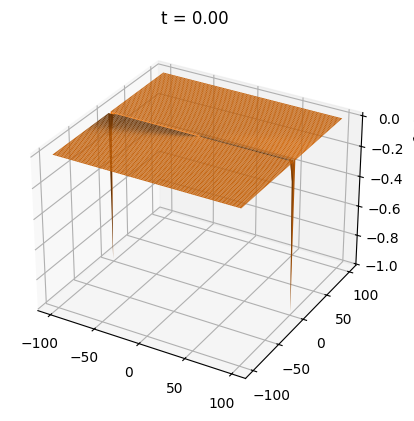

In [11]:
from IPython.display import HTML
theta = np.linspace(-100, 100, 100)
tau = np.linspace(-100, 100, 100)
T = np.linspace(0, 2*np.pi, 120)
X,Y = np.meshgrid(theta, tau)
fig = plot.figure()
ax = fig.add_subplot(projection="3d")
surf = ax.plot_surface(X,Y, fopdt(0, X,Y))

def update(frame_idx):
    global surf
    t = T[frame_idx]

    # Remove old surface and draw new one
    surf.remove()
    Z = fopdt(t, X, Y)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
    ax.set_title(f"t = {t:.2f}")
    return (surf,)

ani = FuncAnimation(
    fig,
    update,
    frames=len(T),
    interval=40,        # ms between frames (~25 FPS)
    blit=False,         # 3D doesn't blit well
    repeat=True
)
HTML(ani.to_html5_video())